<a href="https://colab.research.google.com/github/Dhaks13/SALVO-Month-Of-EDA-2024/blob/main/Team-3/Student_Exam_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Result Representation
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Load data

In [ ]:
df = pd.read_csv('/student_exam_data[1].csv')
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


## **3.DATA PRE-PROCESSING & DATA CLEANING**
  

### Printing data

In [ ]:
print(df)
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

     Study Hours  Previous Exam Score  Pass/Fail
0       4.370861            81.889703          0
1       9.556429            72.165782          1
2       7.587945            58.571657          0
3       6.387926            88.827701          1
4       2.404168            81.083870          0
..           ...                  ...        ...
495     4.180170            45.494924          0
496     6.252905            95.038815          1
497     1.699612            48.209118          0
498     9.769553            97.014241          1
499     9.875897            66.760346          1

[500 rows x 3 columns]
rows: 500
columns: 3


*Already we have the required data in required format for training so no more pre-processing required...*

# 4. DATA VISUALISATION

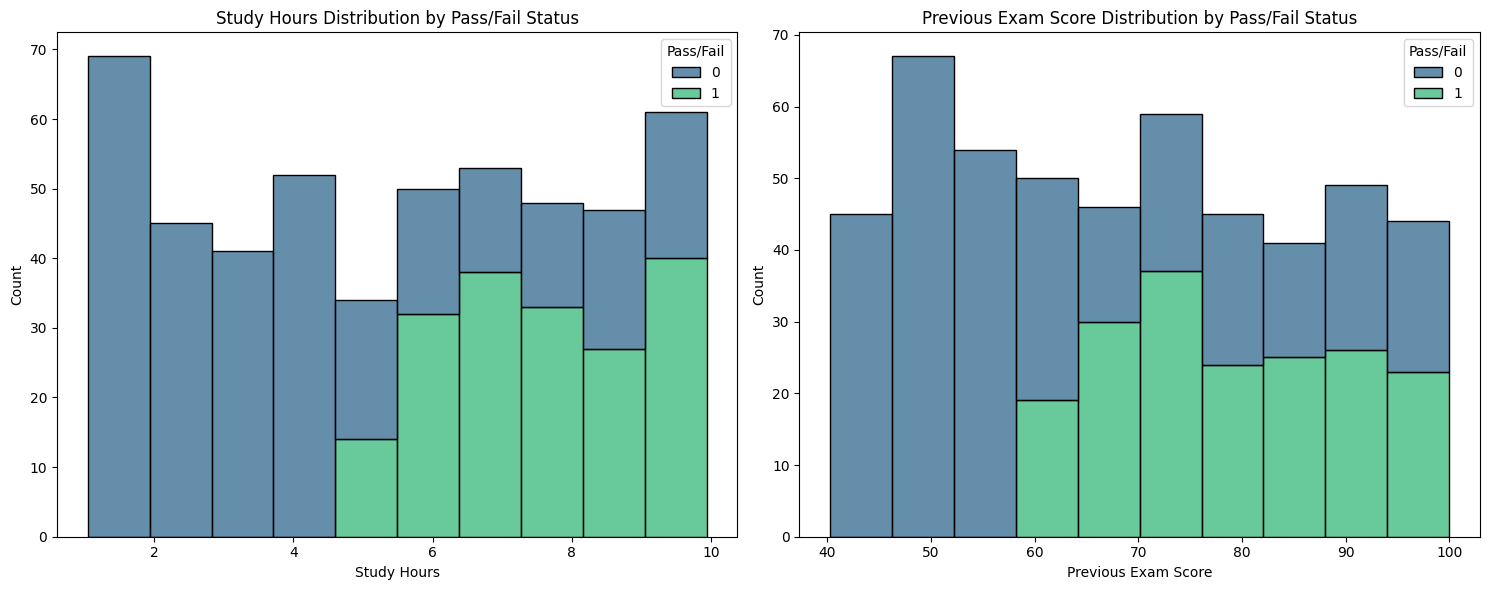

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Study Hours', hue='Pass/Fail',  multiple="stack", palette="viridis")
plt.title('Study Hours Distribution by Pass/Fail Status')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Previous Exam Score', hue='Pass/Fail', multiple="stack", palette="viridis")
plt.title('Previous Exam Score Distribution by Pass/Fail Status')

plt.tight_layout()
plt.show()

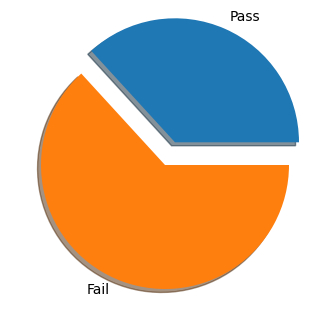

In [ ]:
pass_count=0
for i in df['Pass/Fail']:
  if(i==1):
    pass_count+=1
count=[pass_count,500-pass_count]
fig = plt.figure(figsize=(4, 6))
plt.pie(count, labels =["Pass","Fail"],explode=[0.2, 0],shadow = True)
plt.show()

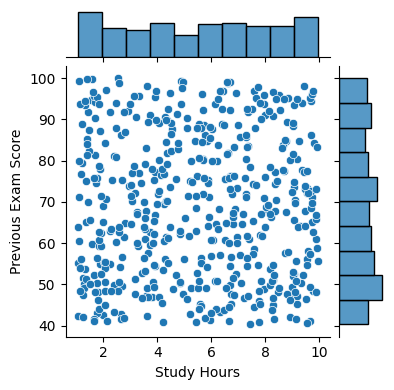

In [ ]:
g = sns.jointplot(df, x = df["Study Hours"], y = df["Previous Exam Score"], height = 4)
g.fig.show()

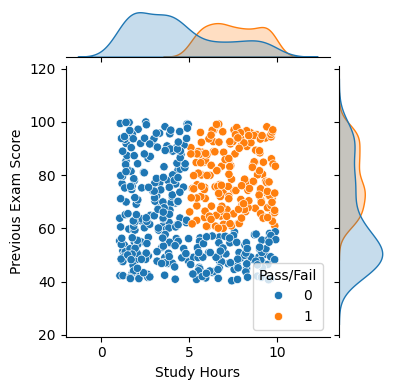

In [ ]:
g = sns.jointplot(df, x = df["Study Hours"], y =df["Previous Exam Score"], hue = 'Pass/Fail',height = 4)
g.fig.show()



---



# 5.Data Training




*   Train = 80%
*   Test = 20%



In [ ]:
X = df.drop('Pass/Fail', axis = 1)
y = df['Pass/Fail']

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)

In [ ]:
y_train.value_counts()

0    254
1    146
Name: Pass/Fail, dtype: int64

In [ ]:
y_test.value_counts()

0    62
1    38
Name: Pass/Fail, dtype: int64

---
Scale our variables


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---

# Using GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [ ]:
new_data = pd.DataFrame({'Study Hours': [5, 7, 5], 'Previous Exam Score': [14, 78, 99]})


new_data_scaled = scaler.transform(new_data)


prediction = model.predict(new_data_scaled)


print("Predicted Pass/Fail:", prediction)

Predicted Pass/Fail: [0 1 0]


---
# Using RandomForestClassifier

In [ ]:
model1= RandomForestClassifier()

In [ ]:
model1.fit(X_train_scaled, y_train)

y_pred = model1.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
new_data = pd.DataFrame({'Study Hours': [5, 7, 5], 'Previous Exam Score': [64, 78, 99]})


new_data_scaled = scaler.transform(new_data)


prediction = model.predict(new_data_scaled)


print("Predicted Pass/Fail:", prediction)

Predicted Pass/Fail: [0 1 0]
